In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans, kmeans_plusplus, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, completeness_score, rand_score, v_measure_score, silhouette_score
from sklearn.metrics.cluster import contingency_matrix, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import Birch

!pip install yellowbrick -q
from yellowbrick.cluster import KElbowVisualizer


from tensorflow import keras

from tensorflow.keras import models, layers
from tensorflow.keras.models import Model, model_from_json

from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, UpSampling2D, Input

import os
import sys
import gc

In [3]:
X = np.load('/content/drive/MyDrive/USML_final_project/Final/cnns1_final.npy')
Y = np.load('/content/drive/MyDrive/USML_final_project/Final/labels_final.npy')
X =  pd.DataFrame(X)

In [4]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1208.846680,0.0,2628.700684,0.0,142.233231,0.0,1189.608765,431.888672,2943.375488,0.0,160.495041,0.0,310.062195,1300.985718,2209.466309,0.0,170.470093,0.0
1,1230.474365,0.0,2759.134766,0.0,133.843277,0.0,1242.616699,312.381287,2917.741699,0.0,153.143188,0.0,358.211670,1590.566650,2508.742188,0.0,146.049042,0.0
2,1413.792480,0.0,3270.656982,0.0,137.015823,0.0,1449.705078,404.979919,3549.027344,0.0,160.990250,0.0,397.449921,1845.065674,2965.112061,0.0,155.675201,0.0
3,1281.966309,0.0,2867.811768,0.0,128.352554,0.0,1348.585571,469.997467,3206.605713,0.0,102.376945,0.0,385.396362,1582.902832,2709.873047,0.0,113.265022,0.0
4,1047.571777,0.0,2241.148926,0.0,134.257309,0.0,1054.579712,462.976990,2582.132324,0.0,167.950424,0.0,308.626617,1086.522095,1938.881958,0.0,177.409363,0.0


In [5]:
le = LabelEncoder()
Y = le.fit_transform(Y)

In [6]:
nunique = X.nunique()
X = X.loc[:, nunique != 1]
X.head()

,0,1,2,4,6,7,8,10,12,13,14,16
0,1208.846680,0.0,2628.700684,142.233231,1189.608765,431.888672,2943.375488,160.495041,310.062195,1300.985718,2209.466309,170.470093
1,1230.474365,0.0,2759.134766,133.843277,1242.616699,312.381287,2917.741699,153.143188,358.211670,1590.566650,2508.742188,146.049042
2,1413.792480,0.0,3270.656982,137.015823,1449.705078,404.979919,3549.027344,160.990250,397.449921,1845.065674,2965.112061,155.675201
3,1281.966309,0.0,2867.811768,128.352554,1348.585571,469.997467,3206.605713,102.376945,385.396362,1582.902832,2709.873047,113.265022
4,1047.571777,0.0,2241.148926,134.257309,1054.579712,462.976990,2582.132324,167.950424,308.626617,1086.522095,1938.881958,177.409363


In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=0, shuffle=True, stratify=Y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(6797, 12) (6797,) (756, 12) (756,)


In [8]:
def contingency_mat(train, train_pred):

    print('''
            =========================================================
            CONTINGENCY MATRIX FOR TRAIN DATA
            =========================================================
            ''')
    print(pd.crosstab(train, train_pred, rownames=['Actual'], colnames=['Predicted']))




# Code to printout entire table #
scores = pd.DataFrame(columns=['Model','Train Homogeneity socre','Train Completeness score','Train V Measure Score', 'Train Rand score','Train Adjusted Rand Score', 'Train Silhoutte Score'])

def get_metrics(x_input, train_actual,train_pred, model_description,dataframe):
    contingency_mat(train_actual,train_pred)
    homo_gen = homogeneity_score(train_actual, train_pred)
    comp_score = completeness_score(train_actual, train_pred)
    vm_score = v_measure_score(train_actual, train_pred)
    rand = rand_score(train_actual, train_pred)
    adj_rand = adjusted_rand_score(y_train, train_pred)
    sh_score = silhouette_score(x_input, train_pred)
    
    dataframe = dataframe.append(pd.Series([model_description, homo_gen, comp_score, vm_score, rand, adj_rand, sh_score], index=scores.columns), ignore_index=True)
    
    return dataframe

def plots(x1_dim, x2_dim, actual_values, pred_values, title):
  #plt.figure(figsize=(12,15))
  df = pd.DataFrame({'X1': x1_dim, 'X2': x2_dim, 'y_actual': actual_values, 'y_pred': pred_values})
  f, ax = plt.subplots(1, 2, sharey='row')
  f.set_figheight(6)
  f.set_figwidth(13)
  sns.scatterplot(x='X1', y='X2', data=df, hue='y_actual', ax = ax[0], palette='viridis')
  ax[0].set_title('Actual Labels')
  sns.scatterplot(x='X1', y='X2', data=df, hue='y_pred', ax = ax[1], palette='viridis')
  ax[1].set_title('Clusters formed')
  f.suptitle(title)

  plt.show()

In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
kmeans1 = KMeans(init='k-means++', random_state=340, n_init = 10, max_iter = 200, n_clusters = 7)
kmeans1.fit(x_train)
scores = get_metrics(x_train, y_train, kmeans1.predict(x_train), 'Kmeans on CNN Autoencoders data', scores)
scores


            CONTINGENCY MATRIX FOR TRAIN DATA
            
Predicted   0    1    2    3    4   5    6
Actual                                    
0          12   22  158  132  332   3  429
1          14  388  286  303  116  12  184
2          17  343  204  291   76   1  131
3          12  130  289  255   84   1  180
4          28  270  191  426    3   1   34
5          22  786  137  256    4  51   22
6          11    2    8    7   66  32   35


,Model,Train Homogeneity socre,Train Completeness score,Train V Measure Score,Train Rand score,Train Adjusted Rand Score,Train Silhoutte Score
0,Kmeans on CNN Autoencoders data,0.124385,0.138643,0.131127,0.722799,0.087227,0.236429


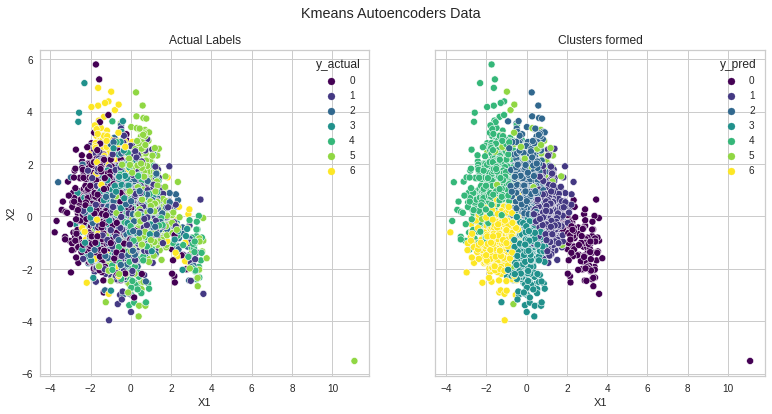

In [11]:
plots(x_train[:, 0], x_train[:, 3], y_train, kmeans1.predict(x_train), 'Kmeans CNN Autoencoders Data')

In [12]:
gmm = GaussianMixture(7, covariance_type='full', random_state=0).fit(x_train)

scores = get_metrics(x_train, y_train, gmm.predict(x_train), 'GMM on CNN Autoencoders data', scores)
scores


            CONTINGENCY MATRIX FOR TRAIN DATA
            
Predicted   0    1   2    3    4    5   6
Actual                                   
0          11    0  38   62  593  357  27
1           9    0  10  582  434  213  55
2          10    0   6  606  359   75   7
3          11    0  10  253  554  116   7
4          28    0  10  478  352   76   9
5          13  102   1  863  187  111   1
6          12    2   0    1    1   74  71


,Model,Train Homogeneity socre,Train Completeness score,Train V Measure Score,Train Rand score,Train Adjusted Rand Score,Train Silhoutte Score
0,Kmeans on CNN Autoencoders data,0.124385,0.138643,0.131127,0.722799,0.087227,0.236429
1,GMM on CNN Autoencoders data,0.106943,0.154243,0.126310,0.640871,0.070637,0.129788


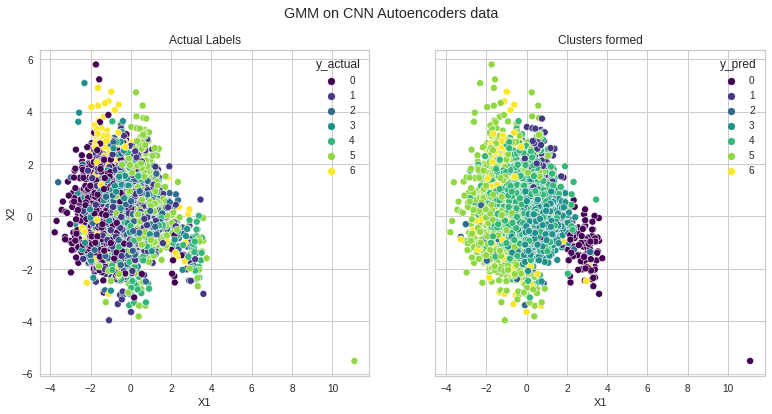

In [13]:
plots(x_train[:, 0], x_train[:, 3], y_train, gmm.predict(x_train), 'GMM on CNN Autoencoders data')

In [14]:
from sklearn.cluster import Birch
birch_model = Birch(threshold=0.03, n_clusters=7)

# train the model
birch_model.fit(x_train)

# assign each data point to a cluster
birch_result = birch_model.predict(x_train)

In [15]:
scores = get_metrics(x_train, y_train, birch_model.predict(x_train), 'BIRCH on CNN Autoencoders data', scores)
scores


            CONTINGENCY MATRIX FOR TRAIN DATA
            
Predicted    0    1   2    3    4   5    6
Actual                                    
0           37  501  17  293  117  12  111
1          477  136  32  208  356  16   78
2          350   92   2  170  357  18   74
3          174  105   4  318  247  12   91
4          302    2   3   79  484  28   55
5          721    2  59   36  401  29   30
6            3   57  59   11    1  12   18


,Model,Train Homogeneity socre,Train Completeness score,Train V Measure Score,Train Rand score,Train Adjusted Rand Score,Train Silhoutte Score
0,Kmeans on CNN Autoencoders data,0.124385,0.138643,0.131127,0.722799,0.087227,0.236429
1,GMM on CNN Autoencoders data,0.106943,0.154243,0.126310,0.640871,0.070637,0.129788
2,BIRCH on CNN Autoencoders data,0.128953,0.146232,0.137050,0.713137,0.087063,0.176262


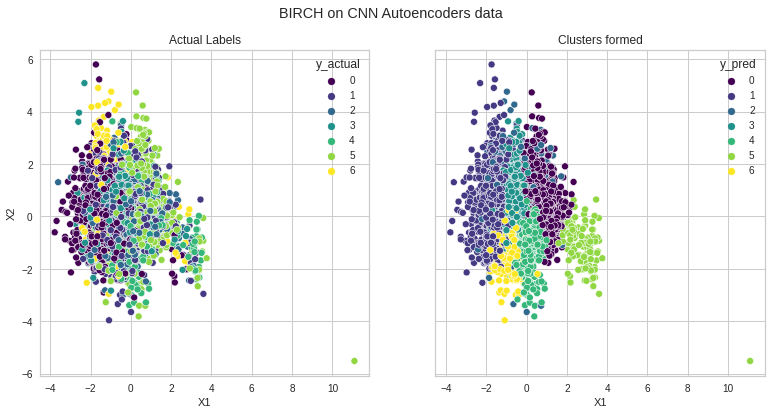

In [16]:
plots(x_train[:, 0], x_train[:, 3], y_train, birch_model.predict(x_train), 'BIRCH on CNN Autoencoders data')

In [17]:
scores

,Model,Train Homogeneity socre,Train Completeness score,Train V Measure Score,Train Rand score,Train Adjusted Rand Score,Train Silhoutte Score
0,Kmeans on CNN Autoencoders data,0.124385,0.138643,0.131127,0.722799,0.087227,0.236429
1,GMM on CNN Autoencoders data,0.106943,0.154243,0.126310,0.640871,0.070637,0.129788
2,BIRCH on CNN Autoencoders data,0.128953,0.146232,0.137050,0.713137,0.087063,0.176262


In [18]:
scores.to_csv('/content/drive/MyDrive/USML_final_project/Final/outputs2.csv', index= False)

In [19]:
scores1 = pd.read_csv('/content/drive/MyDrive/USML_final_project/Final/outputs1.csv')

In [20]:
scores1

,Model,Train Homogeneity socre,Train Completeness score,Train V Measure Score,Train Rand score,Train Adjusted Rand Score,Train Silhoutte Score
0,Kmeans on Normal data,0.052478,0.080841,0.063642,0.600861,0.018020,0.198994
1,GMM on Normal Data data,0.120620,0.144511,0.131490,0.700495,0.091145,-0.035125
2,Birch on Normal Data data,0.078444,0.125618,0.096579,0.580397,0.026055,0.173877
3,Kmeans on PCA data,0.052459,0.080735,0.063596,0.601314,0.018063,0.204431
4,GMM on PCA Data,0.126854,0.165053,0.143454,0.691143,0.095931,-0.033708
5,Birch on PCA data,0.055413,0.088698,0.068212,0.588239,0.021891,0.173768
6,Kmeans on Autoencoder Latent Spaces,0.036814,0.083010,0.051007,0.496233,0.016407,0.402313
7,GMM on Autoencoder Latent Spaces,0.054810,0.067705,0.060579,0.677296,0.018781,-0.010374
8,Birch on Autoencoder Latent Spaces,0.043986,0.066048,0.052805,0.625356,0.018955,0.204742


In [21]:
scores = pd.concat((scores1, scores))
scores

,Model,Train Homogeneity socre,Train Completeness score,Train V Measure Score,Train Rand score,Train Adjusted Rand Score,Train Silhoutte Score
0,Kmeans on Normal data,0.052478,0.080841,0.063642,0.600861,0.018020,0.198994
1,GMM on Normal Data data,0.120620,0.144511,0.131490,0.700495,0.091145,-0.035125
2,Birch on Normal Data data,0.078444,0.125618,0.096579,0.580397,0.026055,0.173877
3,Kmeans on PCA data,0.052459,0.080735,0.063596,0.601314,0.018063,0.204431
4,GMM on PCA Data,0.126854,0.165053,0.143454,0.691143,0.095931,-0.033708
5,Birch on PCA data,0.055413,0.088698,0.068212,0.588239,0.021891,0.173768
6,Kmeans on Autoencoder Latent Spaces,0.036814,0.083010,0.051007,0.496233,0.016407,0.402313
7,GMM on Autoencoder Latent Spaces,0.054810,0.067705,0.060579,0.677296,0.018781,-0.010374
8,Birch on Autoencoder Latent Spaces,0.043986,0.066048,0.052805,0.625356,0.018955,0.204742
0,Kmeans on CNN Autoencoders data,0.124385,0.138643,0.131127,0.722799,0.087227,0.236429


In [22]:
scores.reset_index(inplace=True, drop=True)

In [23]:
scores.to_csv('/content/drive/MyDrive/USML_final_project/Final/final_outputs.csv', index= False)
scores

,Model,Train Homogeneity socre,Train Completeness score,Train V Measure Score,Train Rand score,Train Adjusted Rand Score,Train Silhoutte Score
0,Kmeans on Normal data,0.052478,0.080841,0.063642,0.600861,0.018020,0.198994
1,GMM on Normal Data data,0.120620,0.144511,0.131490,0.700495,0.091145,-0.035125
2,Birch on Normal Data data,0.078444,0.125618,0.096579,0.580397,0.026055,0.173877
3,Kmeans on PCA data,0.052459,0.080735,0.063596,0.601314,0.018063,0.204431
4,GMM on PCA Data,0.126854,0.165053,0.143454,0.691143,0.095931,-0.033708
5,Birch on PCA data,0.055413,0.088698,0.068212,0.588239,0.021891,0.173768
6,Kmeans on Autoencoder Latent Spaces,0.036814,0.083010,0.051007,0.496233,0.016407,0.402313
7,GMM on Autoencoder Latent Spaces,0.054810,0.067705,0.060579,0.677296,0.018781,-0.010374
8,Birch on Autoencoder Latent Spaces,0.043986,0.066048,0.052805,0.625356,0.018955,0.204742
9,Kmeans on CNN Autoencoders data,0.124385,0.138643,0.131127,0.722799,0.087227,0.236429


In [24]:
test_pred = kmeans1.predict(x_test)
print(f'Homogeneity score of best model on test data: {homogeneity_score(y_test, test_pred)}')
print(f'Completeness score of best model on test data: {completeness_score(y_test, test_pred)}')
print(f'V measure score of best model on test data: {v_measure_score(y_test, test_pred)}')
print(f'Rand score of best model on test data: {rand_score(y_test, test_pred)}')
print(f'Adjusted Rand score of best model on test data: {adjusted_rand_score(y_test, test_pred)}')
print(f'Silhoutte score of best model on test data: {silhouette_score(x_test, test_pred)}')

Homogeneity score of best model on test data: 0.1311603473214453
Completeness score of best model on test data: 0.1463657349087165
V measure score of best model on test data: 0.13834649682161987
Rand score of best model on test data: 0.721171029118049
Adjusted Rand score of best model on test data: 0.0731745587051111
Silhoutte score of best model on test data: 0.22979497909545898


In [25]:
x =  pd.crosstab(y_train, kmeans1.predict(x_train) , rownames=['Actual'], colnames=['Predicted'])

In [26]:
df = pd.DataFrame({'Actual': y_train, 'Predicted': kmeans1.predict(x_train), 'New': np.nan})
df.head()

,Actual,Predicted,New
0,3,1,NaN
1,1,3,NaN
2,1,2,NaN
3,1,3,NaN
4,2,1,NaN


In [27]:
df.loc[df['Predicted'] ==1, 'Actual'].value_counts().index[0]

5

In [28]:
for i in df['Predicted'].unique():
  df.loc[df['Predicted'] == i, 'New'] = df.loc[df['Predicted'] ==i, 'Actual'].value_counts().index[0]

In [29]:
df['New'] = df['New'].astype('int64')

In [30]:
y_train1 = le.inverse_transform(df['Actual'])

In [31]:
train_pred = le.inverse_transform(df['New'])

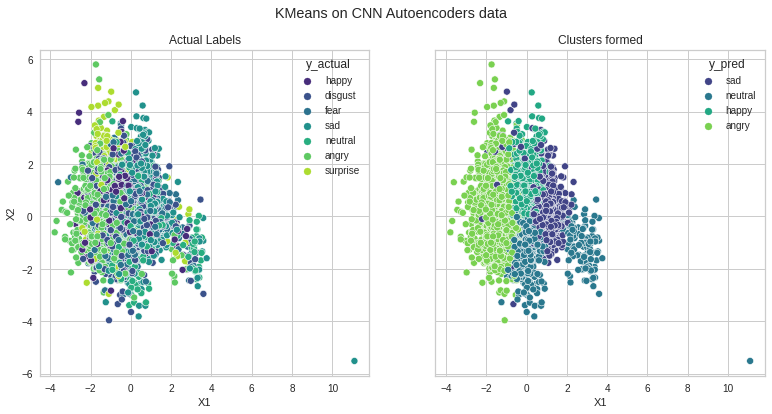

In [32]:
plots(x_train[:, 0], x_train[:, 3], y_train1, train_pred, 'KMeans on CNN Autoencoders data')